In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
class Image(object):
    
    def __init__(self,path):
        self.path = path
        self.bgr_image = None
        self.gray_image = None
        self.rgb_image = None
        
    def read_image(self,return_img = False):
        if not self.rgb_image:
            self.rgb_image = plt.imread(self.path)
            self.bgr_image = np.flip(self.rgb_image,axis=-1)
        
        if return_img:
            return self.bgr_image
    
    def rgb(self,return_img =False):
        if self.rgb_image is None:
            read_image(return_img=True)
        if return_img:
            return self.rgb_image
    
    def gray(self,return_img = False):
        self.gray_image = cv2.cvtColor(self.bgr_image, cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_image
    
    def Show(self,img,title='image'):
        plt.figure(figsize=[20,10])
        plt.imshow(img)
        plt.title(title)
        plt.show()
        
    def Show_all(self,image_list,title_list):
        plt.figure(figsize=[20,10])
        assert len(image_list) == len(title_list), "Houston we've got a problem"
        N = len(image_list)
        for index,(img,title) in enumerate(zip(image_list,title_list)):
            plt.subplot(1,N,index+1)
            if len(img.shape)!=3 :
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
            plt.title(title)
        plt.show()

## Test #1

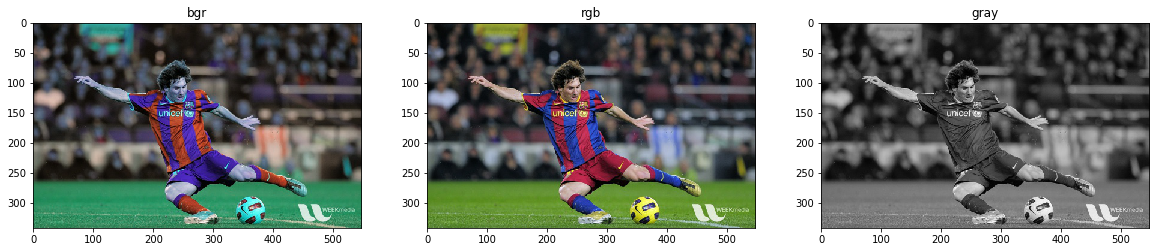

In [3]:
image = Image('./images/messi.jpg')
bgr = image.read_image(return_img=True)
rgb = image.rgb(return_img=True)
gray = image.gray(return_img=True)
image.Show_all([bgr,rgb,gray],['bgr','rgb','gray'])

#### Zero Padding
    padding the image. The padding is calculated so that the output image will have the same demensions as the 
    original image has.
    params:
        image - a HxWxD image
        k - the dimension of the kernel
        stride - the step of the kernel window, by default stride = 1
    return:
        padded_image - an image the have been padded.

In [4]:
def zero_padding(image, k, stride=1):
    h = image.shape[0]
    w = image.shape[1]
    p_w = int((w*(stride - 1) + k-stride)) 
    p_h = int((h*(stride - 1) + k-stride)) # stride = 1 => p = (k-1)/2 
    
    padded_image = np.zeros([p_h + h, p_w + w, image.shape[2]])
    padded_image[1:-1, 1:-1, :] = image

    return padded_image    

In [5]:
def normalize(image):
    '''
        min-max scaling
    '''
    return np.asarray(image/255,dtype='float32')

In [6]:
def convolve2d(image,kernel):
    k = kernel.shape[0] # Considering kernel is NxN (filter) matrix
    image = normalize(image)
    if len(image.shape) < 3:
        image = image.reshape(image.shape[0],image.shape[1],1)
        
    padded_image = zero_padding(image, k) 
    output = np.zeros_like(image)
    
    for dim in range(image.shape[2]): 
        for row in range(image.shape[0]):
            for col in range(image.shape[1]):
                output[row,col,dim] = np.sum((kernel * padded_image[row: row+k, col: col+k,dim]))
                
    if image.shape[2] == 1:
        return output.reshape(image.shape[0],image.shape[1])
    else:
        return output

## Test #2

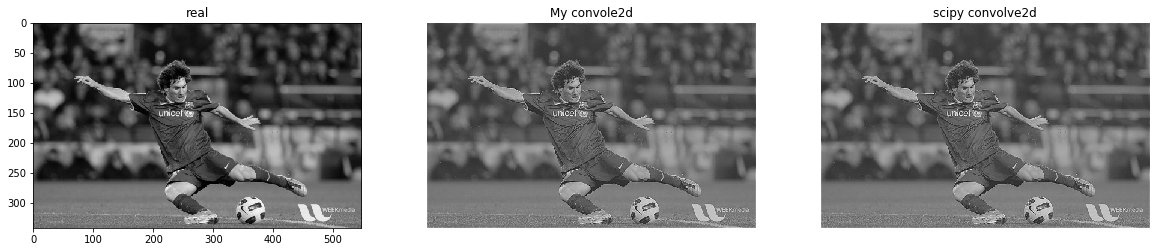

In [7]:
kernel = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4 # this kerenel is the definition of sharpen kernel
image_equalized = gray/np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized,cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel,cmap=plt.cm.gray)
plt.title('My convole2d')
plt.axis('off')
import scipy.signal
image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('scipy convolve2d')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


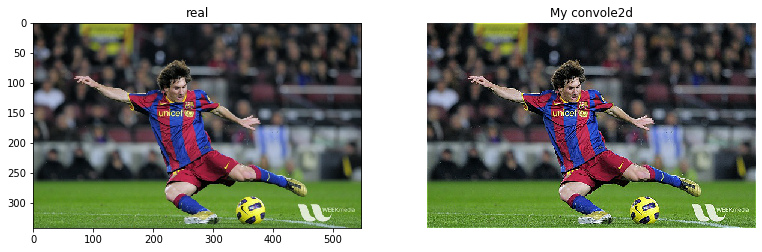

In [8]:
image_equalized = rgb# /np.max(np.abs(rgb))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel)
plt.title('My convole2d')
plt.axis('off')
plt.show()